Мини-анализ данных о покупках пользователей, предварительно собранных из разных папок. Данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день
для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
внутри каждой папки есть файл data.csv, где и хранятся данные. Схематично выглядят так:

└── data    
    ── 2020-12-30     
      ├── FirstName_LastName1    
      │   └── data.csv    
      ├── FirstName_LastName2    
      │   └── data.csv    
      └── FirstName_LastName3    
          └── data.csv   
    ── 2020-12-31    
      ├── FirstName_LastName1    
      │   └── data.csv   
      └── FirstName_LastName5   
          └── data.csv   

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\User\\!JupNotebooks'

In [5]:
for path, dirs, files in os.walk('..\Downloads\data'):
    if files != []:
        print(path,dirs,files)

..\Downloads\data\data\2020-12-03\Alexey_Smirnov [] ['data.csv']
..\Downloads\data\data\2020-12-03\Anton_Petrov [] ['data.csv']
..\Downloads\data\data\2020-12-03\Kirill_Petrov [] ['data.csv']
..\Downloads\data\data\2020-12-03\Petr_Fedorov [] ['data.csv']
..\Downloads\data\data\2020-12-03\Vasiliy_Ivanov [] ['data.csv']
..\Downloads\data\data\2020-12-03\Vasiliy_Petrov [] ['data.csv']
..\Downloads\data\data\2020-12-04\Alexey_Smirnov [] ['data.csv']
..\Downloads\data\data\2020-12-04\Kirill_Fedorov [] ['data.csv']
..\Downloads\data\data\2020-12-04\Petr_Fedorov [] ['data.csv']
..\Downloads\data\data\2020-12-04\Petr_Ivanov [] ['data.csv']
..\Downloads\data\data\2020-12-04\Petr_Smirnov [] ['data.csv']
..\Downloads\data\data\2020-12-04\Rostislav_Fedorov [] ['data.csv']
..\Downloads\data\data\2020-12-04\Rostislav_Ivanov [] ['data.csv']
..\Downloads\data\data\2020-12-04\Rostislav_Smirnov [] ['data.csv']
..\Downloads\data\data\2020-12-04\Vasiliy_Ivanov [] ['data.csv']
..\Downloads\data\data\2020-1

In [4]:
# Собираем все данные из папки data в один датафрэйм:

df = pd.DataFrame()
for path,dirs,files in os.walk('..\Downloads\data'):
    if files != []:
        full_path = path + '\\'+ files[0]
        name = path.split('\\')[-1]
        date = path.split('\\')[-2]
        df1 = pd.read_csv(full_path, sep=',')
        df1['name'] = name
        df1['date'] = date
        df = pd.concat([df,df1], ignore_index = True)
df = df.drop(columns = 'Unnamed: 0')
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [7]:
# Пользователи, купившие больше всего товаров:

df.groupby('name').agg({'quantity':'sum'}).sort_values('quantity',ascending = False).head()

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28


In [8]:
# Топ-10 товаров по числу проданных единиц за всё время:

data1 = df.groupby('product_id').agg({'quantity':'sum'}).sort_values('quantity',ascending = False).head(10).reset_index()
data1

,product_id,quantity
0,27,20
1,56,18
2,24,15
3,74,15
4,41,14
5,34,13
6,94,13
7,66,13
8,92,12
9,50,12


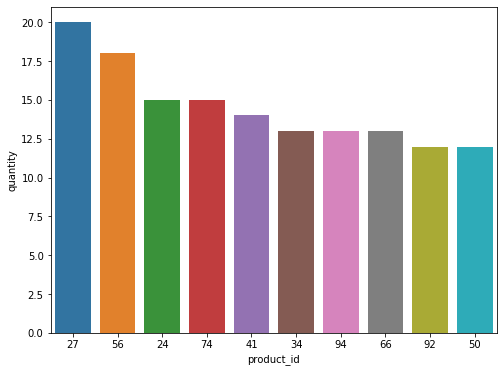

In [9]:
# Визуализируем полученные данные о популярных товарах:

plt.figure(figsize = (8,6))
ax = sns.barplot(x = data1.product_id,y = data1.quantity,data = data1, order= data1.product_id.to_list())

In [10]:
# Визуализируем продажи по дням:

data2 = df.groupby('date').agg({'quantity':'sum'}).sort_values('quantity',ascending = False).reset_index()
data2

,date,quantity
0,2020-12-04,113
1,2020-12-07,94
2,2020-12-09,69
3,2020-12-08,68
4,2020-12-05,61
5,2020-12-03,60
6,2020-12-06,15


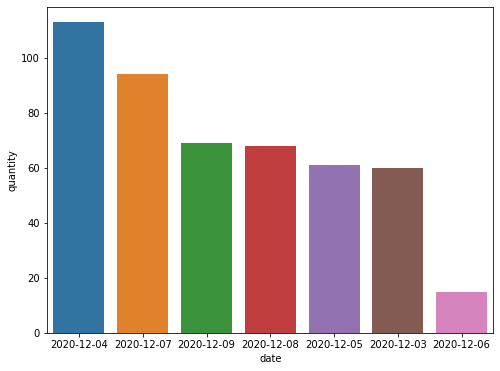

In [14]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x = data2.date,y = data2.quantity,data = data2)

In [20]:
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [23]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать
# покупку товара с одинаковым product_id, совершенную в разные дни

df1 = df.drop_duplicates(subset = ['name','date','product_id'])
df1.loc[df.duplicated(subset = ['name','product_id'])]

,product_id,quantity,name,date
104,94,4,Petr_Fedorov,2020-12-07
147,15,3,Anton_Ivanov,2020-12-09


In [24]:
df.query('name == "Anton_Ivanov"')

,product_id,quantity,name,date
96,15,4,Anton_Ivanov,2020-12-07
143,92,4,Anton_Ivanov,2020-12-09
144,88,3,Anton_Ivanov,2020-12-09
145,24,5,Anton_Ivanov,2020-12-09
146,36,1,Anton_Ivanov,2020-12-09
147,15,3,Anton_Ivanov,2020-12-09
148,90,3,Anton_Ivanov,2020-12-09
